# Homework 5 - 30 points

The next cell creates two sample datasets we'll use throughout this homework.

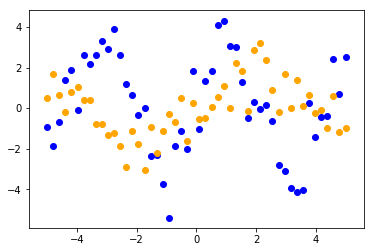

In [91]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# Seed the random number generator for reproducibility
np.random.seed(0)

# Generate data with noise
x = np.linspace(-5, 5, num=50)
sample1 = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)
sample2 = 1.4 * np.sin(0.9 * x_data) + np.random.normal(size=50)

# Visualize our data
plt.scatter(x,sample1, color='blue')
plt.scatter(x,sample2, color='orange')

Let's assume these datasets represent observations we've made of two physical phenomena. We can see from the visualization that there appears to be a sinusoidal trend to both datasets. What we'd like to do is find the best sine wave model for each dataset.

We can represent a generic sine wave as: y = a * sin(bx)  where a and b are parameters that determine the height and width of the sine wave. The sine function can be foun in numpy as np.sin()

Use scipy.optimize.curve_fit() on both sample1 and sample2 to find the best sine wave model for each. 

#### 1.) Set up the fitting and print out the optimal values of a and b for sample 1 (4 points)

In [75]:
def model(x, a, b):
    return a*np.sin(b*x) 
    
fit1, covar1 = scipy.optimize.curve_fit(model, x, sample1)
print("Best fit to sample 1: ", fit1)

Best fit to sample 1:  [3.0593199  1.45754532]


#### 2.) Set up the fitting and print out the optimal values of a and b for sample 2 (3 points)

In [76]:
fit2, covar2 = scipy.optimize.curve_fit(model, x, sample2)
print("Best fit to sample 2: ", fit2)

Best fit to sample 2:  [1.62885342 0.80013959]


#### 3.) Use the values of a and b you obtained in 1.) to plot the model fit on top of the sample1 data points. (3 points)

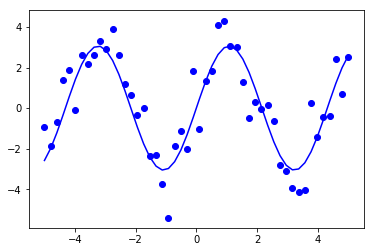

In [77]:
m1 = fit1[0]*np.sin(fit1[1]*x) 
plt.scatter(x,sample1, color='blue')
plt.plot(x, m1, color='blue')

#### 4.) Use the values of a and b you obtained in 2.) to plot the model fit on top of the sample2 data points. (3 points)

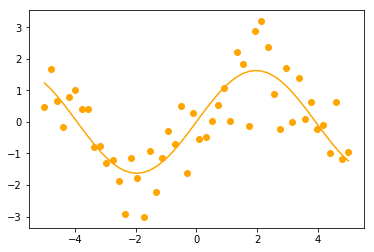

In [78]:
m2 = fit2[0]*np.sin(fit2[1]*x) 
plt.scatter(x,sample2, color='orange')
plt.plot(x, m2, color='orange')

scipy.optimize.curve_fit() returns two values - the optimal values to use for your function's parameters and the covariance matrix. The covariance matrix comes in handy to determine the uncertainty of our optimal value predictions. The standard deviation of the predicted parameters can be found using: np.sqrt(np.diag(covariance_matrix)) where np refers to the numpy library

#### 5.) Compute the uncertainty in a and b for both the sample1 fit and the sample2 fit (2 points)

In [73]:
ferr1 = np.sqrt(np.diag(covar1))
ferr2 = np.sqrt(np.diag(covar2))

In [84]:
print("Sample 1")
print("  The uncertainty in a is %0.2f " % ferr1[0])
print("  The uncertainty in b is %0.2f " % ferr1[1])
print("Sample 2")
print("  The uncertainty in a is %0.2f " % ferr2[0])
print("  The uncertainty in b is %0.2f " % ferr2[1])

Sample 1
  The uncertainty in a is 0.23 
  The uncertainty in b is 0.02 
Sample 2
  The uncertainty in a is 0.17 
  The uncertainty in b is 0.03 


#### 6.) This question pertains only to sample1. Make a scatter plot of the sample1 data points, color it blue. On top of this scatter plot (same panel) plot the model fit for sample1, color it blue. On top of this plot the model fit minus the uncertainty, color it red. In other words, a-error and b-error. On top of all of this plot the model fit plus the uncertainty (a+error and b+error), color it orange. In the end, you should have a scatter plot and 3 line plots. Our model parameters, a and b, have some uncertainty to them. What we're showing here is the predicted best model fit and the upper and lower limits to that fit. Finally, set the x-range of your plot to be [0,3] (10 points)

(0, 3)

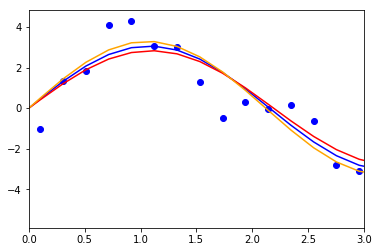

In [100]:
m1 = fit1[0]*np.sin(fit1[1]*x) 
m2 = (fit1[0]-ferr1[0])*np.sin((fit1[1]-ferr1[1])*x) 
m3 = (fit1[0]+ferr1[0])*np.sin((fit1[1]+ferr1[1])*x) 
plt.scatter(x,sample1, color='blue')
plt.plot(x, m1, color='blue')
plt.plot(x, m2, color='red')
plt.plot(x, m3, color='orange')
plt.xlim(0,3)

#### 7.) Is the model fit to sample1 "better" or "worse" than the model fit to sample2? How can you tell? What factors might account for one model fit being "better" than another? (5 points)